資料集:<br>
Laptop Price Prediction<br>
https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Laptop_price.csv')


count = df['Storage_Capacity'].value_counts()
print(count)

256     357
1000    336
512     307
Name: Storage_Capacity, dtype: int64


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

Selected Features and Target Variable:
          Price  Storage_Capacity         Price
0  17395.093065               512  17395.093065
1  31607.605919              1000  31607.605919
2   9291.023542               256   9291.023542
3  17436.728334               512  17436.728334
4  32917.990718              1000  32917.990718


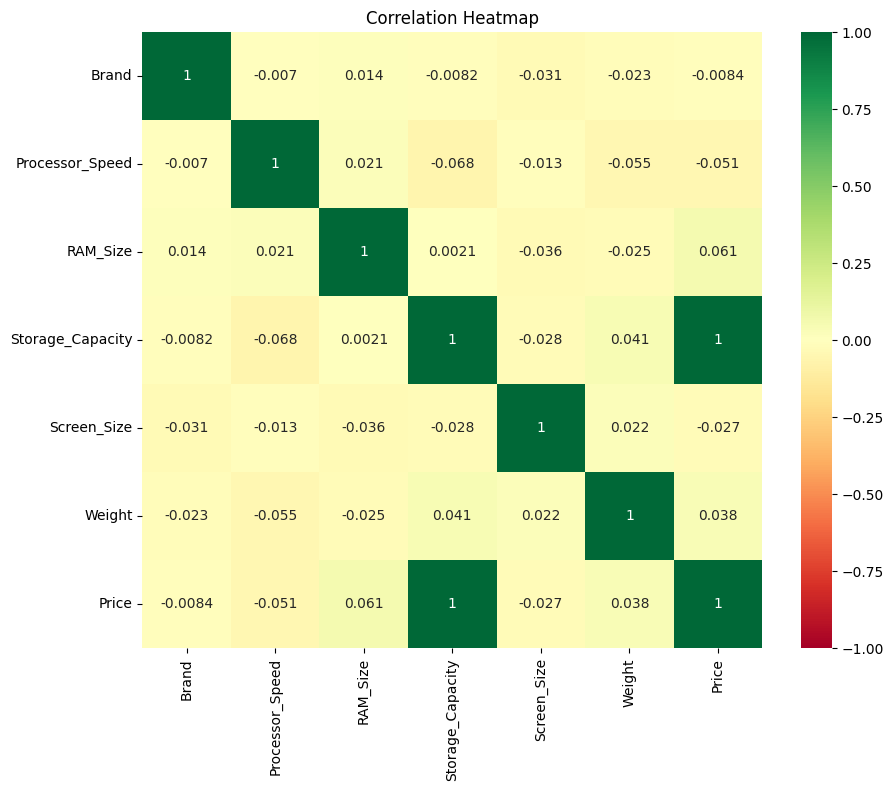

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 編碼字串型態的資料
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # 只處理字串型態的資料
        df[column] = label_encoder.fit_transform(df[column])

# 提取特徵和目標變數
X = df.drop(['Price'], axis=1)
y = df['Price']

# 計算特徵與目標變數的相關係數
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Price'].abs().sort_values(ascending=False)

# 選擇相關係數大於閾值的特徵
threshold = 0.5
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# 保留選擇的特徵及目標變數
selected_df = df[selected_features + ['Price']]

# 顯示選擇的特徵及目標變數
print("Selected Features and Target Variable:")
print(selected_df.head())

# 繪製特徵與目標變數的相關係數熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# 提取特徵和目標變數
X = df.drop(['Price', 'Storage_Capacity'], axis=1)
y = df['Price']

# 創建梯度提升樹模型
model = GradientBoostingRegressor()

# 訓練模型
model.fit(X, y)

# 獲取特徵重要性
feature_importance = model.feature_importances_

# 建立特徵重要性的DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 根據特徵重要性降序排列
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 打印特徵重要性
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
           Feature  Importance
4           Weight    0.317388
1  Processor_Speed    0.296645
3      Screen_Size    0.263449
0            Brand    0.085207
2         RAM_Size    0.037312


In [ ]:
!pip install pipelineprofiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.1/881.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.7 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Linear Regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


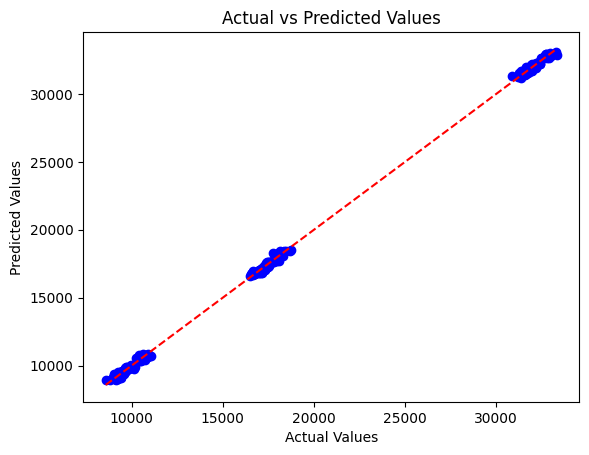


Mean Squared Error (MSE): 31969.582469869267
Root Mean Squared Error (RMSE): 178.80039840523082
Mean Absolute Error (MAE): 145.27235007959655
Mean Absolute Percentage Error (MAPE): 0.9547405395516328
R squared: 0.9996478987127725
Prection loss (MSE): 31969.58247


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, average_precision_score, classification_report, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# import PipelineProfiler
import numpy as np
from joblib import dump, load
from sklearn.model_selection import RepeatedStratifiedKFold

df = pd.read_csv('/content/drive/MyDrive/Laptop_price.csv')

# 編碼字串型態的資料
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # 只處理字串型態的資料
        df[column] = label_encoder.fit_transform(df[column])


# 提取特徵和目標變數

X = df.drop(['Price'], axis=1)
y = df['Price']

# 將數據集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 創建線性回歸模型
model = LinearRegression()
# 使用訓練集訓練模型
model.fit(X_train, y_train)
# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)


predicted = model.predict(X_train.values)
# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)

# 匯出模型
dump(model, 'model.joblib')
# 匯入模型
model = load('model.joblib')

predicted = model.predict(X_test.values)
print('Prection loss (MSE):', mean_squared_error(
    y_test, predicted).round(5))
# print('Prection accuracy:', accuracy_score(
#     y_test, predicted).round(5))
# print(classification_report(y_test, predicted))

## Poly Regression

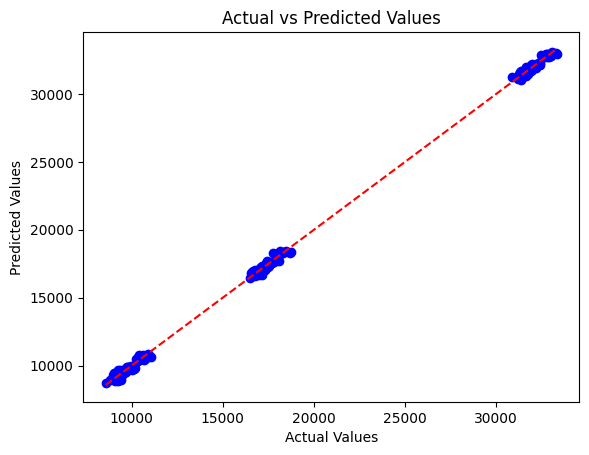


Mean Squared Error (MSE): 40117.659049401125
Root Mean Squared Error (RMSE): 200.29393163398916
Mean Absolute Error (MAE): 161.84317474064576
Mean Absolute Percentage Error (MAPE): 1.0820864955355511
R squared: 0.9995581587777956


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# 提取特徵和目標變數
X = df.drop(['Price'], axis=1)
y = df['Price']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


# 創建多項式特徵轉換器
poly = PolynomialFeatures()
# 將特徵資料轉換為多項式特徵
X_poly = poly.fit_transform(X)

# 將轉換後的特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 創建多項式回歸模型
model = LinearRegression()

# 使用訓練及訓練模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


## RandomForest

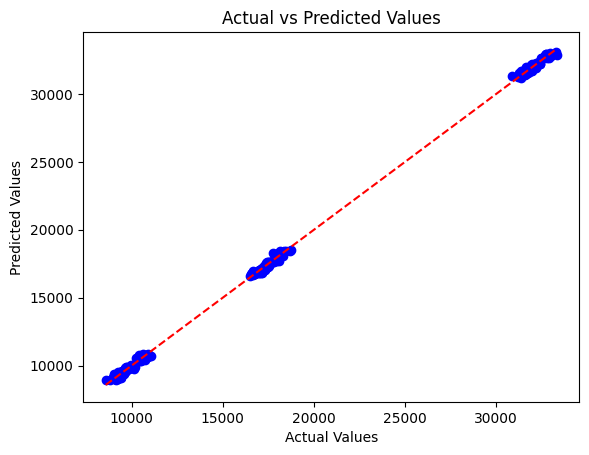


Mean Squared Error (MSE): 31969.582469869267
Root Mean Squared Error (RMSE): 178.80039840523082
Mean Absolute Error (MAE): 145.27235007959655
Mean Absolute Percentage Error (MAPE): 0.9547405395516328
R squared: 0.9996478987127725


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/drive/MyDrive/Laptop_price.csv')

# 編碼字串型態的資料
label_encoder = LabelEncoder()
for column in df.columns:
    if data[column].dtype == 'object':  # 只處理字串型態的資料
        data[column] = label_encoder.fit_transform(df[column])


# 切分特徵和目標變數
X = data.drop('Price', axis=1)
y = data['Price']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立隨機森林模型
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

## 使用訓練集訓練隨機森林回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# # 繪製隨機森林中的一棵樹
# plt.figure(figsize=(10, 8))
# tree.plot_tree(model.estimators_[0], filled=True)
# plt.show()

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)